<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Avon!

I'm happy to review your project today 🙌

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Avon,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.



If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



## Preparation

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [2]:
# initial data analysis
print(data.info())
display(data.describe())
display(data.head())

# data sorted by date index ascending, resampled by 1 hour, sum
data.sort_index(inplace=True)
data = data.resample('1h').sum()

# post processing analysis
print(data.info())
display(data.describe())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


**- During data resampling, we've gone from 10-minute intervals per observation, to 60-minute/1-hour intervals, totaling the amount of taxis ordered per hour.**

**- Our total number of observations has gone from 26,496 to 4,416, this checks out seeing as though we've essentially divided by 6, and (26,496 / 4,416) = 6.**

**- Our window of data stretches between (March 1, 2018 @ 00:00:00) to (August 31, 2018 @ 23:00:00). 5 months, 30 days, 23 hours.**

**- As expected our summary statistics have also changed dramatically with this 'observation compression', all values (mean,median, max) have all increased, with the minimum remaining 0.**

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great data overview!

## Analysis

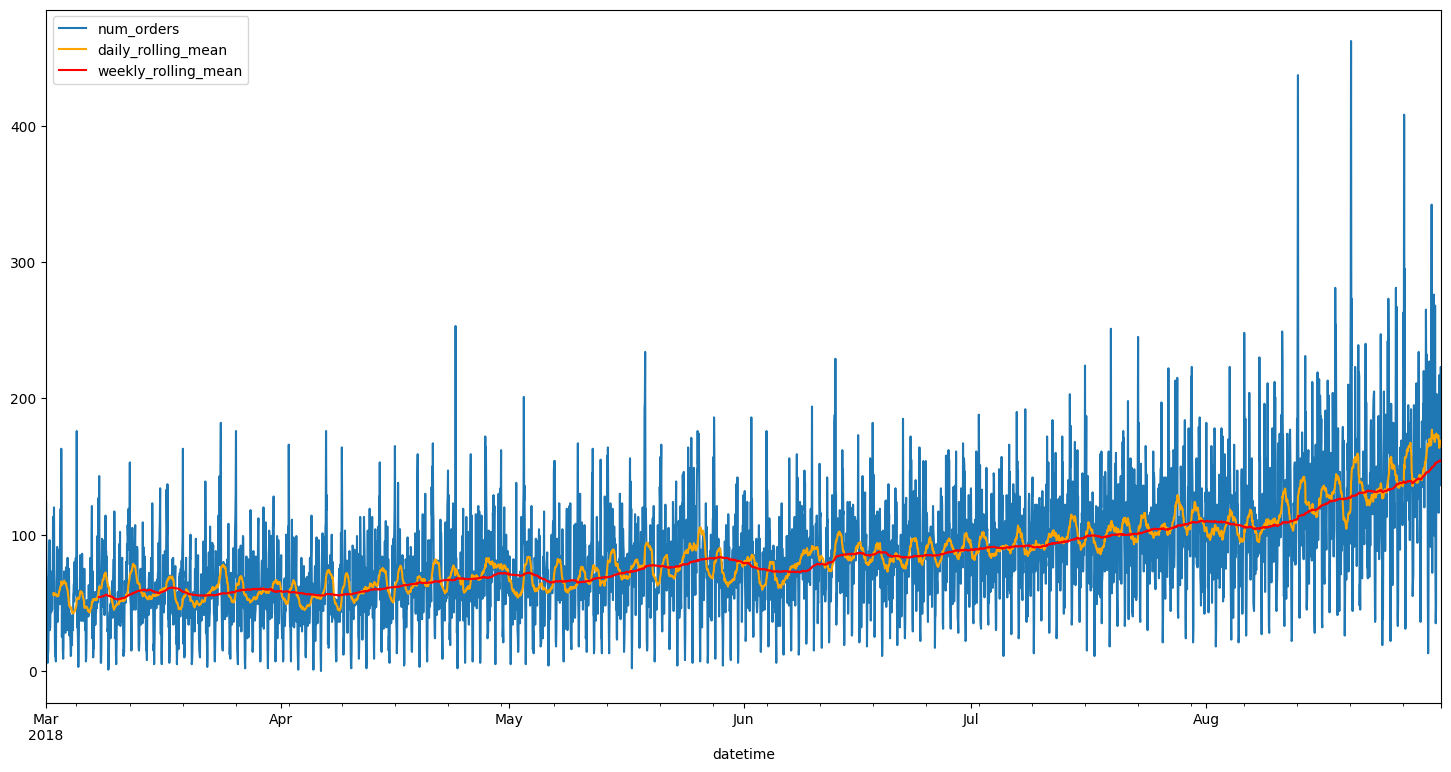

In [3]:
# capturing daily/weekly averages
data['daily_rolling_mean'] = data['num_orders'].rolling(24).mean()
data['weekly_rolling_mean'] = data['num_orders'].rolling(168).mean()

# plotting hourly totals, alongside daily & weekly averages
ax = data['num_orders'].plot(figsize=(18, 9))
data['daily_rolling_mean'].plot(ax=ax, color='orange')
data['weekly_rolling_mean'].plot(ax=ax, color='red')
ax.legend()

**- I've opted for both a 24-hour and 168-hour rolling mean, giving us the daily and weekly averages throughout our hourly observational window. There is slightly positive trend in our data, with mid-late August seeing the largest increase in average orders.**

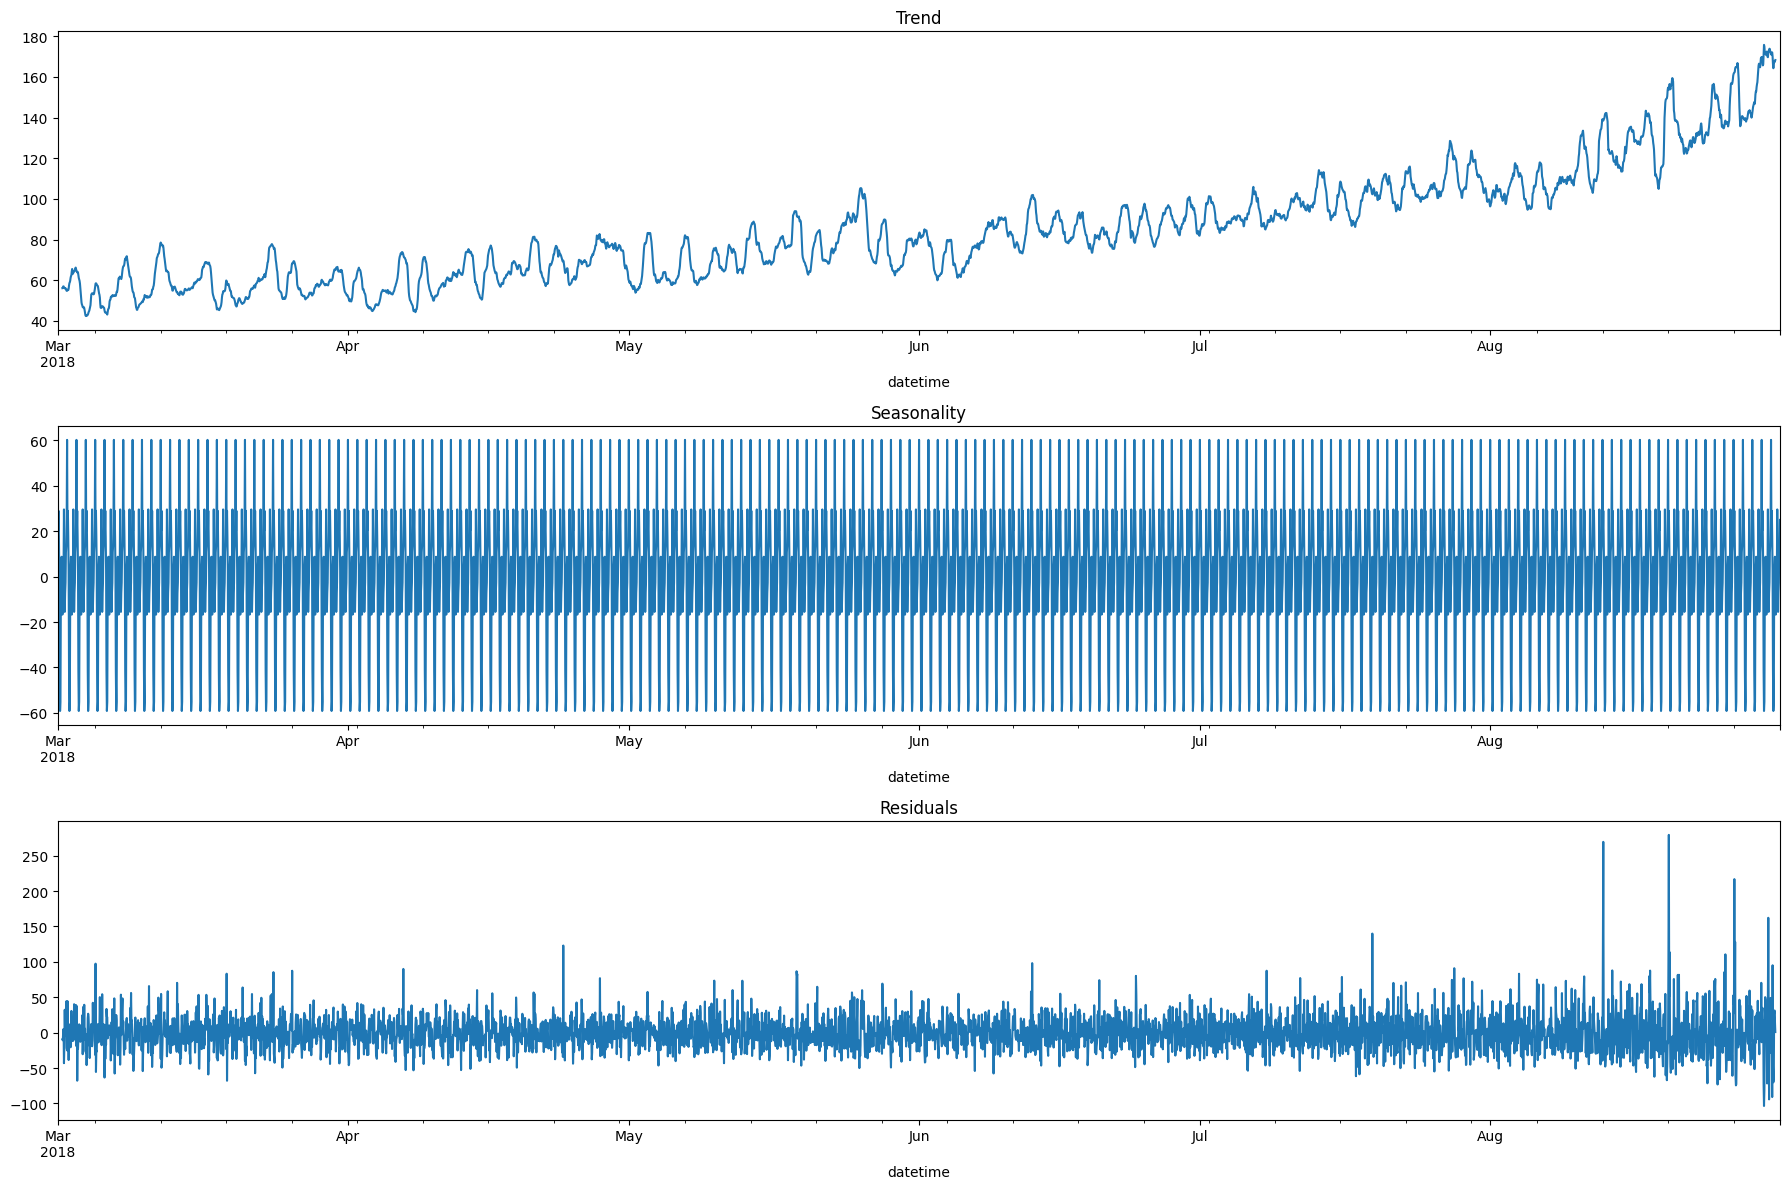

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = data.drop(['daily_rolling_mean', 'weekly_rolling_mean'], axis=1)
decomposed = seasonal_decompose(data)

plt.figure(figsize=(18, 12))

plt.subplot(311) # trend graph
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312) # seasonality graph
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313) # residuals graph
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

**- Our trend graph looks remarkably similar to our daily (24h) rolling average from the previous analysis step. We have a clear positive trend, meaning out data is non-stationary. The seasonality graph is way too crowded to see the cyclical pattern intervals, and our residuals graph represents seemingly random fluctuations not captured by seasonality or trend.**

**- I will be generating a seasonal decomposition graph sliced for the first week of august so we can more closely analyze the pattern.**

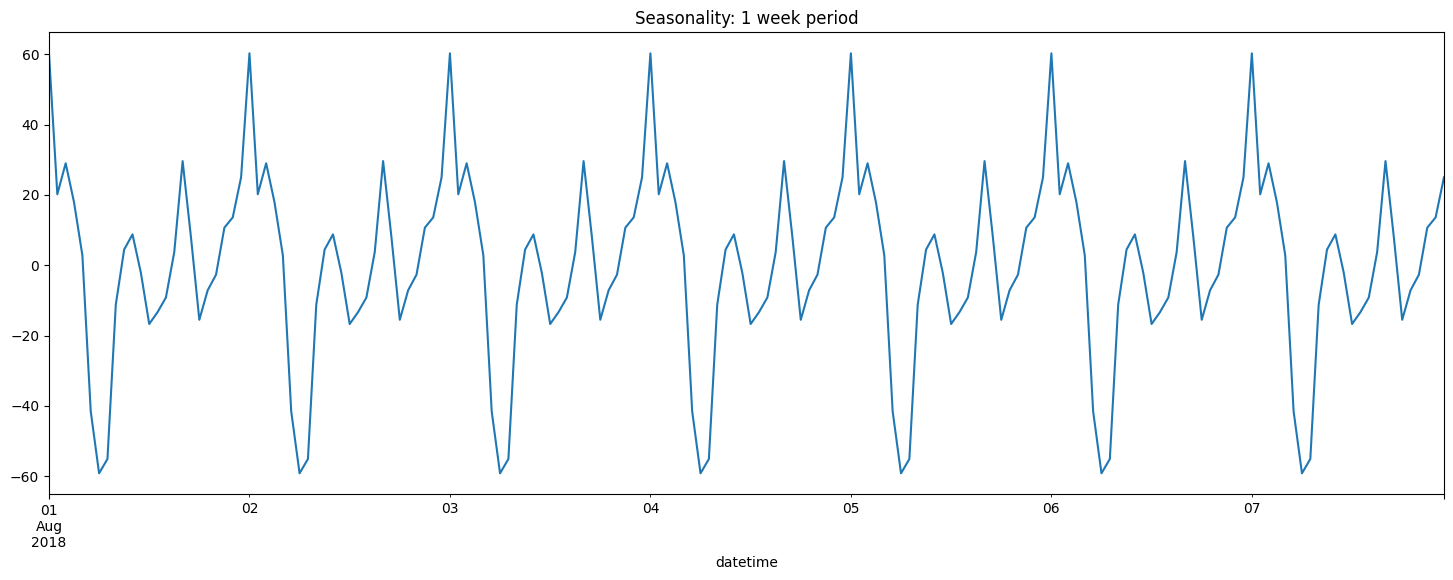

In [5]:
decomposed.seasonal['2018-08-01':'2018-08-07'].plot(figsize=(18, 6))
plt.title('Seasonality: 1 week period')
plt.show()

**- Our seasonal period is (m=24). It seems as though peak taxi times are between 6p-11p, with a rapid decline between 12a-4a, and this pattern is ocurring every 24 hours.**

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great data analysis!

## Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 9:1 train-test split, no shuffle
train, test = train_test_split(data, test_size=0.1, shuffle=False)

# RMSE function, tripleten site does not support native RMSE function
def RMSE(true, pred):
    return mean_squared_error(true, pred) ** 0.5

In [7]:
# sanity check: mean
print('Mean hourly taxi orders:', train['num_orders'].mean())

pred_mean = np.ones(test.shape) * train['num_orders'].mean()

print('RMSE (mean):', RMSE(test['num_orders'], pred_mean))

# sanity check: previous value
pred_previous = test.shift()
pred_previous.iloc[0] = train.iloc[-1]

print('RMSE (previous):', RMSE(test['num_orders'], pred_previous))

Mean hourly taxi orders: 78.29063915450428
RMSE (mean): 84.74414402014742
RMSE (previous): 58.856486242815066


**- Sanity check performed, our benchmark has been set. The mean gives us an RMSE that exceeds even the the average hourly orders, but this is expected since values change wildly in a 24-hour period. Shifting the values forward, and using the past value as the prediction gives us a much lower RMSE, which is also expected since we're using neighboring values that align with existing seasonality patterns.**

In [8]:
# feature engineering for LR: hour, day, day of week, month, lag, rolling mean
def make_features(data, max_lag, rolling_mean_size):
    data_copy = data.copy()
    data_copy['hour'] = data_copy.index.hour
    data_copy['day'] = data_copy.index.day  
    data_copy['day_of_week'] = data_copy.index.dayofweek
    data_copy['month'] = data_copy.index.month
    
    for lag in range(1, max_lag + 1):
        data_copy['lag_{}'.format(lag)] = data_copy['num_orders'].shift(lag)

    data_copy['rolling_mean'] = (data_copy['num_orders'].shift().rolling(rolling_mean_size).mean())

    return data_copy

In [9]:
# ------ LINEAR REGRESSION ------ 
from sklearn.linear_model import LinearRegression

# feature engineering, train-test split, drop na
lr_data = make_features(data, 12, 24)
train, test = train_test_split(lr_data, test_size=0.1, shuffle=False)
train = train.dropna()

# train set features and target
train_features = train.drop('num_orders', axis=1)
train_target = train['num_orders']

# test set features and target
test_features = test.drop('num_orders', axis=1)
test_target = test['num_orders']

# model initiation and fitting
model = LinearRegression()
model.fit(train_features, train_target)

# model prediction and scoring, train and test
pred_train = model.predict(train_features)
pred_test = model.predict(test_features)

print('Train RMSE (LR):', RMSE(train_target, pred_train))
print('Test RMSE (LR):', RMSE(test_target, pred_test))

Train RMSE (LR): 30.05258774899737
Test RMSE (LR): 51.080343530756565


**- LinearRegression scored better than our benchmarks against both the training and test sets, however, our LR model performance against the test set falls short of our goal: RMSE > 48**

**- We will be using our LR Test RMSE (51.08) as the new goal for our more advanced models to overcome.**

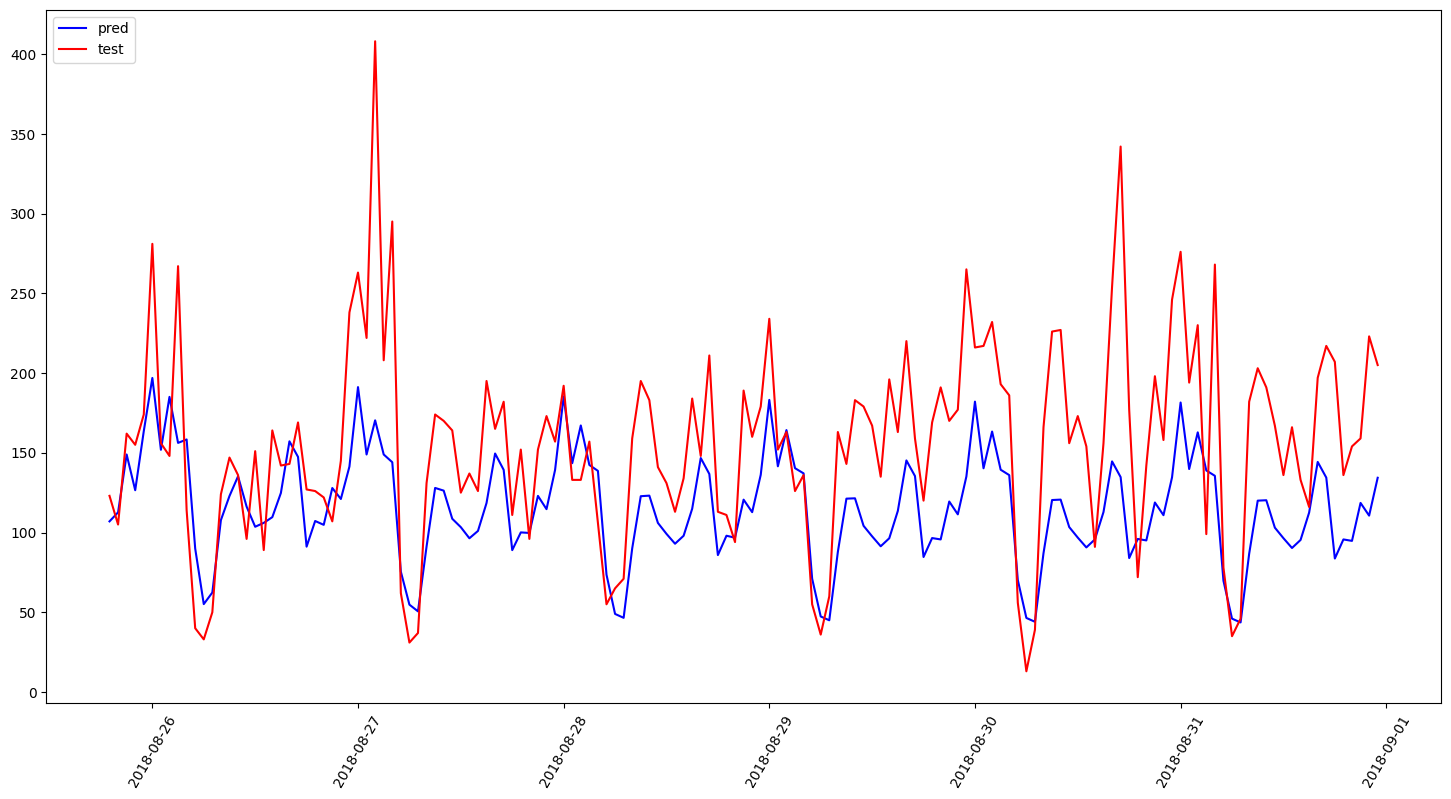

AutoRegression RMSE: 61.3596994484913


In [10]:
# ------ AUTO REGRESSION ------
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# splitting data
recent_data = data['2018-07-01':]  # using recent data for AR model accuracy
train, test = train_test_split(recent_data, test_size=0.1, shuffle=False)

# finding optimal lag
optimal = ar_select_order(endog=train, maxlag=30)
ar_order = optimal.ar_lags

# model initiation and fitting, seasonal=True for 24-hour seasonality
ar_model = AutoReg(endog=train, lags=ar_order, seasonal=True, period=24)
ar_model = ar_model.fit()

# model prediction
start_value = len(train)
end_value = len(train) + len(test) - 1
ar_pred = ar_model.predict(start=start_value, end=end_value, dynamic=False)

plt.figure(figsize=(18, 9))
plt.plot(ar_pred, color='blue', label='pred')
plt.plot(test, color='red', label='test')
plt.legend(loc="upper left")
plt.xticks(rotation=60)
plt.show()

print('AutoRegression RMSE:', RMSE(test['num_orders'], ar_pred))

**- Slicing our data to begin in July gives our AR model better trend adaptation since it is only forecasting roughly 2 months, instead of nearly 6.**

**- AutoRegression has resulted in a higher RMSE than even LinearRegression (61.35 vs 51.08). This is expected though, since AutoRegression does not perform well againt non-stationary data. We can see that the AR model predicts the same seasonal pattern regardless of changing trend.**

**- AutoRegression performs worse on non-stationary data compared to LinearRegression because of LR drawing comparisons between data points, similar to using the previous value as a prediction, these methods move with the trend, resulting in more accurate predictions.**

In [11]:
# ------ Auto Regression Integrated Moving Average (ARIMA) ------
from statsmodels.tsa.arima.model import ARIMA
import warnings

train, test = train_test_split(data, test_size=0.1, shuffle=False)

warnings.filterwarnings("ignore")

best_score = 100
best_order = (0, 0, 0)

for ar_order in range(1, 4, 1):
    for diff_order in range(0, 3, 1):
        for ma_order in range(1, 4, 1):
            full_order = (ar_order, diff_order, ma_order)
            model = ARIMA(train, order=full_order)
            model = model.fit()
            model_pred = model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
            rmse = RMSE(test['num_orders'], model_pred)
            if rmse < best_score:
                best_score = rmse
                best_order = full_order

warnings.filterwarnings("default")

print('Best ARIMA order:', best_order)
print('Best ARIMA RMSE:', best_score)

Best ARIMA order: (1, 2, 2)
Best ARIMA RMSE: 60.72305253618535


**- After iterating through hyperparameter combinations (p, d, q) = (1, 2, 2), our ARIMA model performs slightly better than AR alone (61.35 vs 60.72), but does not take into account the strong seasonality present in our data. Next we will train SARIMA, or Seasonal ARIMA, in hopes that accounting for our 24-hour seasonality, alongside non-stationarity, will result in much more accurate predictions.**

In [12]:
# ------ SEASONAL ARIMA (SARIMA) ------
from statsmodels.tsa.statespace.sarimax import SARIMAX

#warnings.filterwarnings("ignore")

#best_score = 100
#best_order = ((0, 0, 0), (0, 0, 0, 24))

#for p in range(1, 3):
#    for d in range(0, 2):
#        for q in range(1, 3):
#            for P in range(0, 2):
#                for D in range(0, 2):
#                    for Q in range(0, 2):
#                        try:
#                            order = (p, d, q)
#                            seasonal_order = (P, D, Q, 24)
#                            model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
#                            model_fit = model.fit(disp=False)
#                            model_pred = model_fit.forecast(len(test))
#                            rmse = RMSE(test['num_orders'], model_pred)
#                            if rmse < best_score:
#                                best_score = rmse
#                                best_order = (order, seasonal_order)
#                        except:
#                            continue

#warnings.filterwarnings("default")

# manually input best params to avoid long runtimes, these are the best found above
best_order = ((2, 1, 1), (1, 1, 1, 24))
best_score = 39.33

print('Best SARIMA order:', best_order)
print('Best SARIMA RMSE:', best_score)

Best SARIMA order: ((2, 1, 1), (1, 1, 1, 24))
Best SARIMA RMSE: 39.33


**- After iterating through 6 different hyperparameters, and 15 minutes later, we've arrived at the incredible (RMSE = 39.33), doing substantially better than all of the previous models. For the sake of submitting this project, and the sanity of who will be grading this, I will be using hashes to prevent this cell from stalling the notebook. At this moment in time I'm unsure of a better way to loop through hyperparameter combinations, and the study material did not cover a best practice for this, so I used a standard hyperparameter loop I typically use for RandomForest and DecisionTree.**

**- Hyperparameters associated with the best SARIMA model are ((2, 1, 1), (1, 1, 1, 24))**

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Done in an excellent manner and all your conclusions are correct.

## Testing

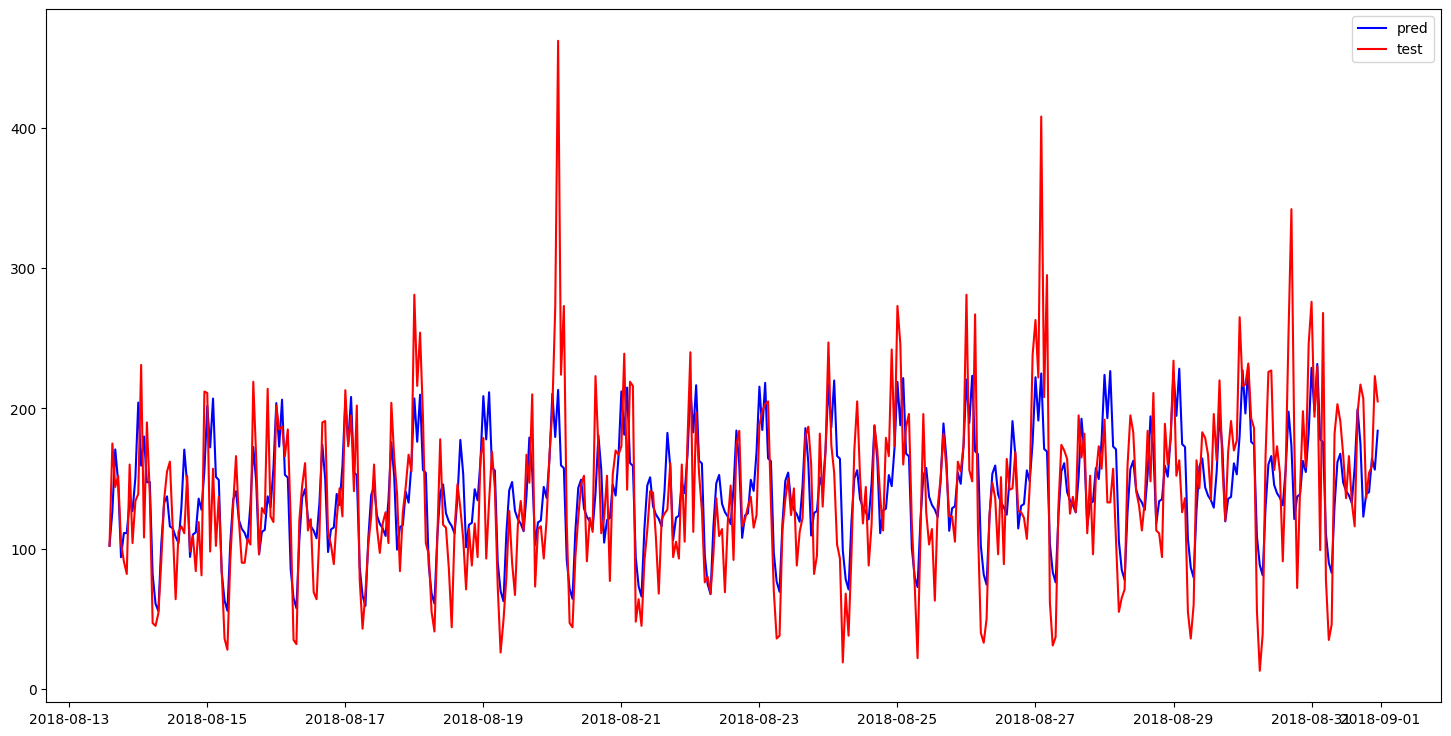

SARIMA RMSE: 39.33828899399944
Goal RMSE: < 48
Best Model: SARIMA(train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 24))


In [13]:
order = (2, 1, 1)
seasonal_order = (1, 1, 1, 24)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
model_pred = model_fit.forecast(len(test))

plt.figure(figsize=(18, 9))
plt.plot(model_pred, color='blue', label='pred')
plt.plot(test, color='red', label='test')
plt.legend()
plt.show()

print('SARIMA RMSE:', RMSE(test['num_orders'], model_pred))
print('Goal RMSE: < 48')
print(f'Best Model: SARIMA(train, order={order}, seasonal_order={seasonal_order})')

**- We miss the anomalous peaks, but these have no rhyme or reason to them (residuals from trend/seasonal analysis step). With that in mind, I believe we've found the optimal model for Sweet Lift Taxi, beating the goal RMSE of 48 by roughly 9 orders! (9 taxis ordered) (RMSE = 39.33)**

**- Best Model: SARIMA(train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 24))**

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

Always remember to include a final conclusion since it is the closing of your work and demonstrates maturity in your project.

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48